# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터 살펴보기

In [ ]:
!pip install xlrd==1.2.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/toy project 22.4.21/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


## 데이터 분포 확인하기

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

##1.치안과 관련된 분석(범죄율, 저소득층)

- 흑인, 저소득층과 범죄율의 관계

In [ ]:
df1 = df[["CRIM","LSTAT","B"]]
df1

,CRIM,LSTAT,B
0,0.00632,4.98,396.90
1,0.02731,9.14,396.90
2,0.02729,4.03,392.83
3,0.03237,2.94,394.63
4,0.06905,5.33,396.90
...,...,...,...
501,0.06263,9.67,391.99
502,0.04527,9.08,396.90
503,0.06076,5.64,396.90
504,0.10959,6.48,393.45


In [ ]:
df1.corr()

,CRIM,LSTAT,B
CRIM,1.000000,0.455621,-0.385064
LSTAT,0.455621,1.000000,-0.366087
B,-0.385064,-0.366087,1.000000


-> 흑인은 범죄율에 상관관계가 적다

In [ ]:
del df1['B']

In [ ]:
df1 = df[["CRIM","LSTAT","MEDV"]]
df1

,CRIM,LSTAT,MEDV
0,0.00632,4.98,24.0
1,0.02731,9.14,21.6
2,0.02729,4.03,34.7
3,0.03237,2.94,33.4
4,0.06905,5.33,36.2
...,...,...,...
501,0.06263,9.67,22.4
502,0.04527,9.08,20.6
503,0.06076,5.64,23.9
504,0.10959,6.48,22.0


In [ ]:
df1.corr()

,CRIM,LSTAT,MEDV
CRIM,1.000000,0.455621,-0.388305
LSTAT,0.455621,1.000000,-0.737663
MEDV,-0.388305,-0.737663,1.000000


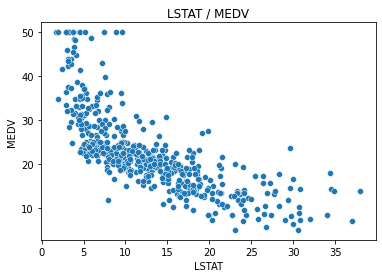

In [ ]:
plt.title("LSTAT / MEDV")
sns.scatterplot(data=df1, x="LSTAT", y="MEDV")
plt.show()

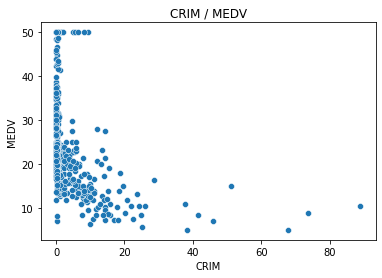

In [ ]:
plt.title("CRIM / MEDV")
sns.scatterplot(data=df1, x="CRIM", y="MEDV")
plt.show()

-> 따라서 범죄율과 저소득층 비율이 적은 곳이 집값이 비싸다

##2.주택의 환경(넓이, 방의 수, 찰스 강 뷰 여부)에 따른 분석

In [ ]:
df2 = df[["ZN","CHAS","RM","MEDV","CAT. MEDV"]]
df2

,ZN,CHAS,RM,MEDV,CAT. MEDV
0,18.0,0,6.575,24.0,0
1,0.0,0,6.421,21.6,0
2,0.0,0,7.185,34.7,1
3,0.0,0,6.998,33.4,1
4,0.0,0,7.147,36.2,1
...,...,...,...,...,...
501,0.0,0,6.593,22.4,0
502,0.0,0,6.120,20.6,0
503,0.0,0,6.976,23.9,0
504,0.0,0,6.794,22.0,0


In [ ]:
df2.corr()

,ZN,CHAS,RM,MEDV,CAT. MEDV
ZN,1.000000,-0.042697,0.311991,0.360445,0.365296
CHAS,-0.042697,1.000000,0.091251,0.175260,0.108631
RM,0.311991,0.091251,1.000000,0.695360,0.641265
MEDV,0.360445,0.175260,0.695360,1.000000,0.789789
CAT. MEDV,0.365296,0.108631,0.641265,0.789789,1.000000


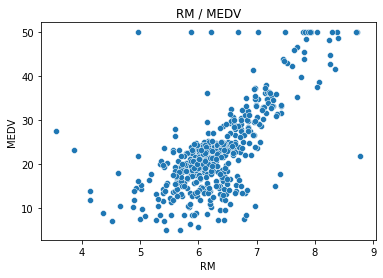

In [ ]:
plt.title("RM / MEDV")
sns.scatterplot(data=df2, x=("RM"), y="MEDV")
plt.show()

In [ ]:
#방 갯수별 고가의 집 여부
def room_num(x):
  if x<4:
    return "less"
  elif (x>=4) & (x<7):
    return "common"
  elif x>=7:
    return "many"
df2["room_num"] = df2["RM"].map(room_num)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


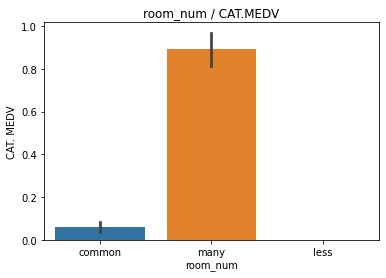

In [ ]:
plt.title("room_num / CAT.MEDV")
sns.barplot(data=df2, x="room_num", y="CAT. MEDV")
plt.show()

-> 방의 갯수가 많으면 집값이 올라가며, 방이 7개 이상이면 대부분 고가의 집이다.

<function matplotlib.pyplot.show>

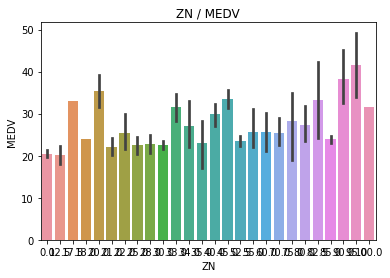

In [ ]:
plt.title("ZN / MEDV")
sns.barplot(data=df2, x='ZN', y='MEDV')
plt.show

-> 넓은 평수는 집값에 큰 작용을 미치지 않는다



---



- 찰스강 뷰 여부



<function matplotlib.pyplot.show>

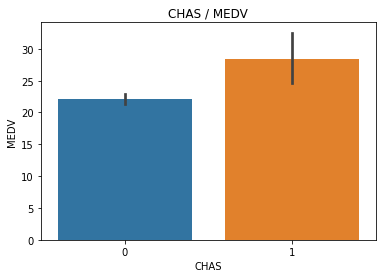

In [ ]:
plt.title("CHAS / MEDV")
sns.barplot(data=df2, x='CHAS', y='MEDV')
plt.show

<function matplotlib.pyplot.show>

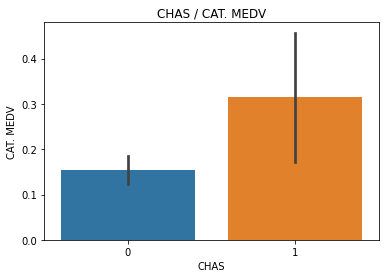

In [ ]:
plt.title("CHAS / CAT. MEDV")
sns.barplot(data=df, x='CHAS', y='CAT. MEDV')
plt.show

In [ ]:
#방 갯수별 평수, 찰스강 여부, 집값 비교
df2_room = df2.groupby('room_num').agg('mean')
df2_room

,ZN,CHAS,RM,MEDV,CAT. MEDV
room_num,,,,,
common,8.970455,0.061364,6.109352,20.212727,0.061364
less,0.000000,0.000000,3.712000,25.300000,0.000000
many,28.171875,0.125000,7.570094,38.396875,0.890625


<function matplotlib.pyplot.show>

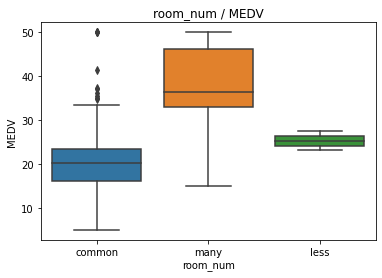

In [ ]:
plt.title("room_num / MEDV")
sns.boxplot(data=df2, x='room_num', y='MEDV')
plt.show

찰스강 뷰가 보통 더 집이 비싸고, 고가의 집은 대부분 찰스강 뷰가 많다.

방이 많을수록 집이 비싸지고, 방이 7개 이상이면 대부분 고가의 집이며 찰스강 뷰 이다.
찰스강 뷰가 보이는 집이 보통 더 비싸고 고가의 집들은 대부분 찰스강 뷰이다.

##3.주거환경(직장과의 거리, 비소매상업지역, 일산화질소 농도, 고속도로접근성)에 따른 분석

In [ ]:
df3 = df[["DIS","INDUS","NOX","RAD","MEDV","CAT. MEDV"]]
df3.head()

,DIS,INDUS,NOX,RAD,MEDV,CAT. MEDV
0,4.0900,2.31,0.538,1,24.0,0
1,4.9671,7.07,0.469,2,21.6,0
2,4.9671,7.07,0.469,2,34.7,1
3,6.0622,2.18,0.458,3,33.4,1
4,6.0622,2.18,0.458,3,36.2,1


In [ ]:
df3.corr()

,DIS,INDUS,NOX,RAD,MEDV,CAT. MEDV
DIS,1.000000,-0.708027,-0.769230,-0.494588,0.249929,0.118887
INDUS,-0.708027,1.000000,0.763651,0.595129,-0.483725,-0.366276
NOX,-0.769230,0.763651,1.000000,0.611441,-0.427321,-0.232502
RAD,-0.494588,0.595129,0.611441,1.000000,-0.381626,-0.197924
MEDV,0.249929,-0.483725,-0.427321,-0.381626,1.000000,0.789789
CAT. MEDV,0.118887,-0.366276,-0.232502,-0.197924,0.789789,1.000000


In [ ]:
#직장과 거리별 분류
def dis_work(x):
  if x<2:
    return "close"
  elif (x>=2) & (x<6):
    return "common"
  elif x>6:
    return "far"
df3["dis_work"] = df3["DIS"].map(dis_work)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


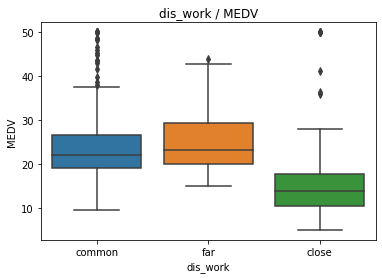

In [ ]:
plt.title("dis_work / MEDV")
sns.boxplot(data=df3, x='dis_work', y='MEDV')
plt.show()

-> 평균적으로 직업센터와 멀수록 집값이 높다 (DIS가 클수록 먼 거리라면)



---



In [ ]:
#비소매상업지역별 분류
def indus(x):
  if x<5:
    return 1
  elif (x>=5) & (x<10):
    return 2
  elif (x>=10) & (x<15):
    return 3
  else:
    return 4
df3["indus"] = df3["INDUS"].map(indus)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


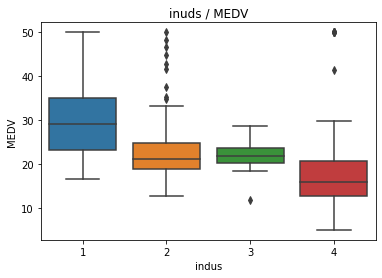

In [ ]:
plt.title("inuds / MEDV")
sns.boxplot(data=df3, x='indus', y='MEDV')
plt.show()



---



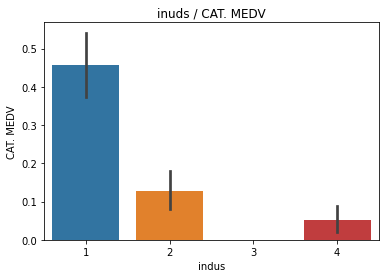

In [ ]:
#비소매상업 지역과 고가의 집 비교
plt.title("inuds / CAT. MEDV")
sns.barplot(data=df3, x='indus', y='CAT. MEDV')
plt.show()

-> 평균적으로 소매상업지역이 넓을수록 집값이 높고, 고가의집은 소매상업지역이 넓은 곳에 많다



---



In [ ]:
#일산화질소 농도에 따른 분류
def den_NOX(x):
  if x<0.4:
    return "low"
  elif (x>=0.4) & (x<0.7):
    return "medium"
  else:
    return "high"
df3["den_NOX"] = df3["NOX"].map(den_NOX)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


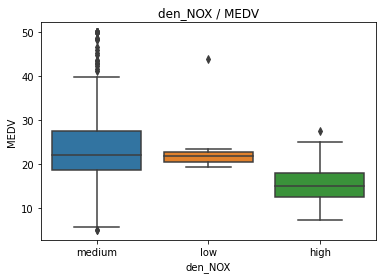

In [ ]:
plt.title("den_NOX / MEDV")
sns.boxplot(data=df3, x='den_NOX', y='MEDV')
plt.show()

-> 일산화질소 농도가 높은지역은 집값이 낮다



---



In [ ]:
#고속도로 접근성에 따른 분류
def road(x):
  if x<5:
    return 1
  elif (x>=5) & (x<10):
    return 2
  elif (x>=10) & (x<15):
    return 3
  else:
    return 4
df3["road"] = df3["RAD"].map(road)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


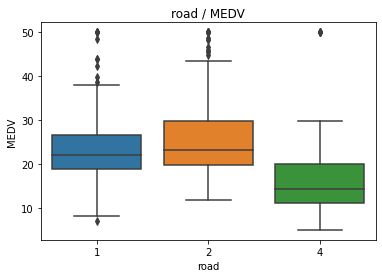

In [ ]:
plt.title("road / MEDV")
sns.boxplot(data=df3, x='road', y='MEDV')
plt.show()

-> 고속도로와 거리가 멀면 집값이 낮다

##4. 종합적 분석

1. 치안에 따른 분류(저소득층)
2. 주택환경에 따른 분류(방의 갯수, 찰스강 뷰)
3. 주거환경에 따른 분류(소매상업지역의 면적)
- 각 분류별 가장 큰 요소로 작용하는 데이터만 정리함

위의 세가지 분류에 따른 종합적 분석


---



In [ ]:
# 방이 7개 이상, 찰스강 뷰 집값 평균
df[(df["RM"]>=7) & (df["CHAS"]==1)]["MEDV"].mean()

42.037499999999994

In [ ]:
#방이 7개 이상, 비소매상업지역 비율 5미만 집값 평균
df[(df["RM"]>=7) & (df["INDUS"]<5)]["MEDV"].mean()

38.521428571428565

In [ ]:
#저소득층 비율 10미만, 비소매상업지역 비율 5미만 집갑 평균
df[(df["LSTAT"]<10) & (df["INDUS"]<5)]["MEDV"].mean()

31.27281553398058

In [ ]:
#위 세 조건 중 집값이 높은 요소들을 모두 따졌을때의 집값 여부
df[(df["LSTAT"]<10) & (df["RM"]>=7) & (df["CHAS"]==1) & (df["INDUS"]<5)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
282,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01,46.0,1
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0,1


***-> 결론 : 저소득층이 10 미만, 방이 7개이상, 찰스강 뷰, 비소매상업지역 면적 비율 5 미만을 만족하는 곳은 대부분 MEDV가 높은 집이며, CAT. MEDV가 1이므로 세가지 조건은 높은 집값을 만족하는 요소로 볼수 있다***

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>